### Step 1: Import packages and read Data

In [1]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
df = pd.read_csv('./amazon_fine_food_reviews/Reviews.csv')
df = df.head(200)

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### Quick EDA

<AxesSubplot:title={'center':'Count of Reviews by Stars'}>

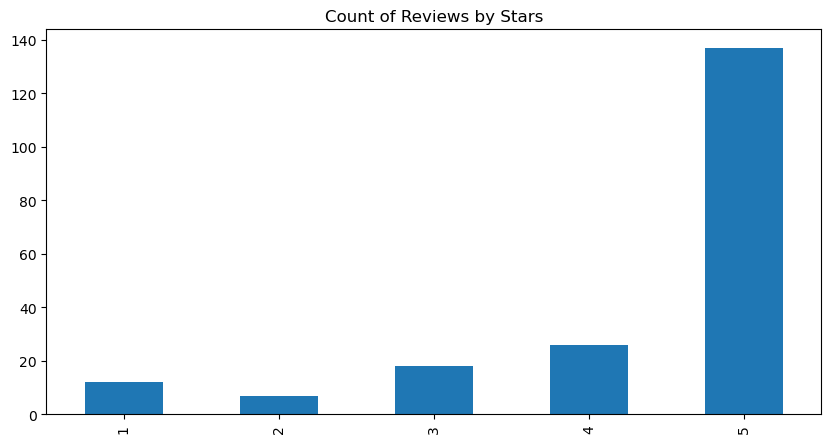

In [4]:
df.Score.value_counts().sort_index().plot(kind='bar' ,title='Count of Reviews by Stars',figsize=(10,5))

In [5]:
example = df['Text'][40]
example

"The variety packs taste great!<br /><br />I have them every morning. At $0.30 cents per meal, I don't understand why everyone on earth isn't buying this stuff up.<br /><br />Maple and brown sugar is terrific, followed by apples and cinnamon, followed by regular. You don't get tired of the same ole thing, and they taste great.<br /><br />I just boil water from a small pot, empty the packet or 2 in a bowl, pour in boiling water, and watch it expand to 2x its size!<br /><br />Taste really good and takes minutes to prepare.<br /><br />Not sure why everyone on earth isn't this. Convenient, healthy, very quick, excellent quality, and extremely cheap..."

In [6]:
tokens_sample = nltk.word_tokenize(example)

In [7]:
tagged = nltk.pos_tag(tokens_sample)

In [8]:
entity = nltk.chunk.ne_chunk(tagged)

In [9]:
entity.pprint()

(S
  The/DT
  variety/NN
  packs/VBZ
  taste/NN
  great/JJ
  !/.
  </JJ
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NN
  I/PRP
  have/VBP
  them/PRP
  every/DT
  morning/NN
  ./.
  At/IN
  $/$
  0.30/CD
  cents/NNS
  per/IN
  meal/NN
  ,/,
  I/PRP
  do/VBP
  n't/RB
  understand/VB
  why/WRB
  everyone/NN
  on/IN
  earth/NN
  is/VBZ
  n't/RB
  buying/VBG
  this/DT
  stuff/NN
  up./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  Maple/NNP
  and/CC
  brown/JJ
  sugar/NN
  is/VBZ
  terrific/JJ
  ,/,
  followed/VBN
  by/IN
  apples/NNS
  and/CC
  cinnamon/NN
  ,/,
  followed/VBN
  by/IN
  regular/JJ
  ./.
  You/PRP
  do/VBP
  n't/RB
  get/VB
  tired/VBN
  of/IN
  the/DT
  same/JJ
  ole/JJ
  thing/NN
  ,/,
  and/CC
  they/PRP
  taste/VBP
  great./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  I/PRP
  just/RB
  boil/VBP
  water/NN
  from/IN
  a/DT
  small/JJ
  pot/NN
  ,/,
  empty/VBP
  the/DT
  packet/NN
  or/CC
  2/CD
  in/IN
  a/DT
  bowl/

### Step 02: VADER Sentiment Scoring

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
#Progress bar tracker tqdm
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [11]:
sia.polarity_scores('may be I am happy')

{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}

In [12]:
sia.polarity_scores('this is so bad and illegal')

{'neg': 0.676, 'neu': 0.324, 'pos': 0.0, 'compound': -0.8539}

In [13]:
res = {}
for i , row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    id = row['Id']
    res[id] = sia.polarity_scores(text)

  0%|          | 0/200 [00:00<?, ?it/s]

In [14]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [15]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,0.000,0.761,0.239,0.9538,B0028C44Z0,A3B6S35IUGOGW4,Rutt10,1,1,5,1300406400,Altoids mini mints tins,These little tins of sugar free mine mints wer...
196,197,0.000,0.917,0.083,0.4738,B0028C44Z0,AI7O5C9KBVSTF,i&#60;3pnutbutter,3,4,5,1274054400,Altoids Smalls-Wintergreen,"Pros:<br />+packaging, shipping, price<br />+s..."
197,198,0.000,0.904,0.096,0.4153,B0028C44Z0,A4LL4KXLRBQHQ,stillgoinstrong,2,3,3,1278460800,Sugarfree...,Be careful not to eat too many of them in one ...
198,199,0.000,0.701,0.299,0.8268,B0028C44Z0,A3U94LRA4I8YAL,"Brenda Woodward ""love to read""",2,3,5,1265932800,Tasty!!,These mints are really strong and have a great...


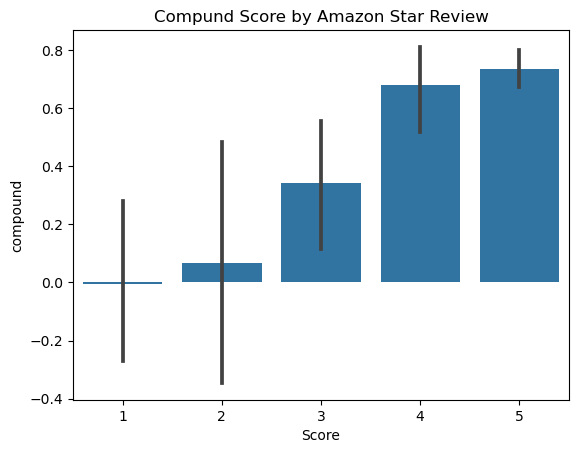

In [16]:
default_color = sns.color_palette()[0]
ax = sns.barplot(data=vaders, x='Score', y='compound',color = default_color)
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

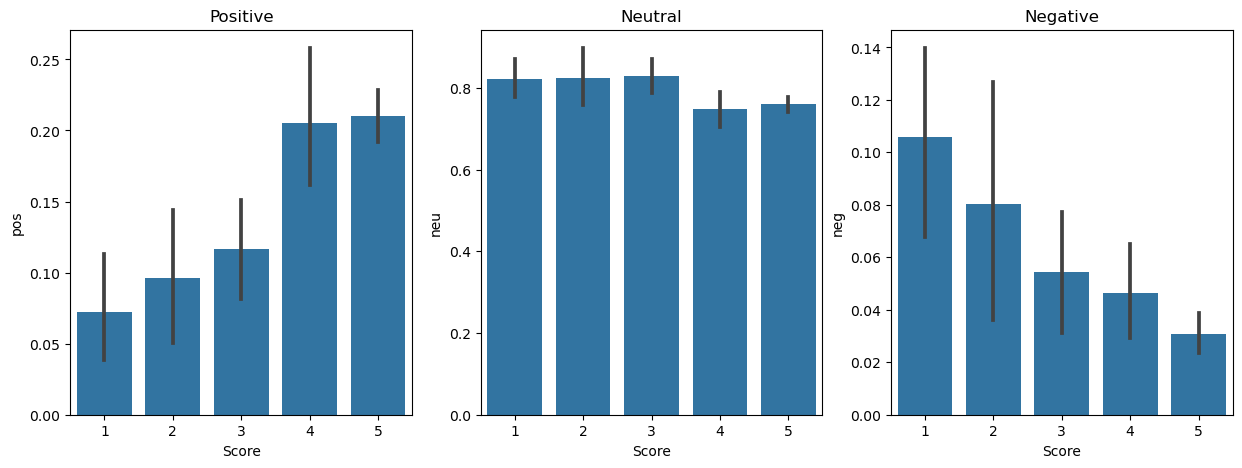

In [17]:
fig, axs = plt.subplots(1,3,figsize=(15,5)) 
sns.barplot(data= vaders,x='Score',y='pos',ax=axs[0],color=default_color)
sns.barplot(data= vaders,x='Score',y='neu',ax=axs[1],color=default_color)
sns.barplot(data= vaders,x='Score',y='neg',ax=axs[2],color=default_color)
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

In [18]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [19]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [20]:

print(example)
sia.polarity_scores(example)

The variety packs taste great!<br /><br />I have them every morning. At $0.30 cents per meal, I don't understand why everyone on earth isn't buying this stuff up.<br /><br />Maple and brown sugar is terrific, followed by apples and cinnamon, followed by regular. You don't get tired of the same ole thing, and they taste great.<br /><br />I just boil water from a small pot, empty the packet or 2 in a bowl, pour in boiling water, and watch it expand to 2x its size!<br /><br />Taste really good and takes minutes to prepare.<br /><br />Not sure why everyone on earth isn't this. Convenient, healthy, very quick, excellent quality, and extremely cheap...


{'neg': 0.033, 'neu': 0.82, 'pos': 0.147, 'compound': 0.9301}

In [21]:
encoded_text = tokenizer(example,return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

In [22]:
scores_dict = {
    'rob_neg' : scores[0],
    'rob_neu' : scores[1],
    'rob_pos' : scores[2],
}
print(scores_dict)

{'rob_neg': 0.009690555, 'rob_neu': 0.037833188, 'rob_pos': 0.95247626}


In [23]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'rob_neg' : scores[0],
        'rob_neu' : scores[1],
        'rob_pos' : scores[2]
    }
    return scores_dict

In [24]:
res = {}
for i , row in tqdm(df.iterrows(), total = len(df)):
    try:
        print(row['Id'])
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/200 [00:00<?, ?it/s]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
Broke for id 83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
Broke for id 187
188
189
190
191
192
193
194
195
196
197
198
199
200


In [25]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

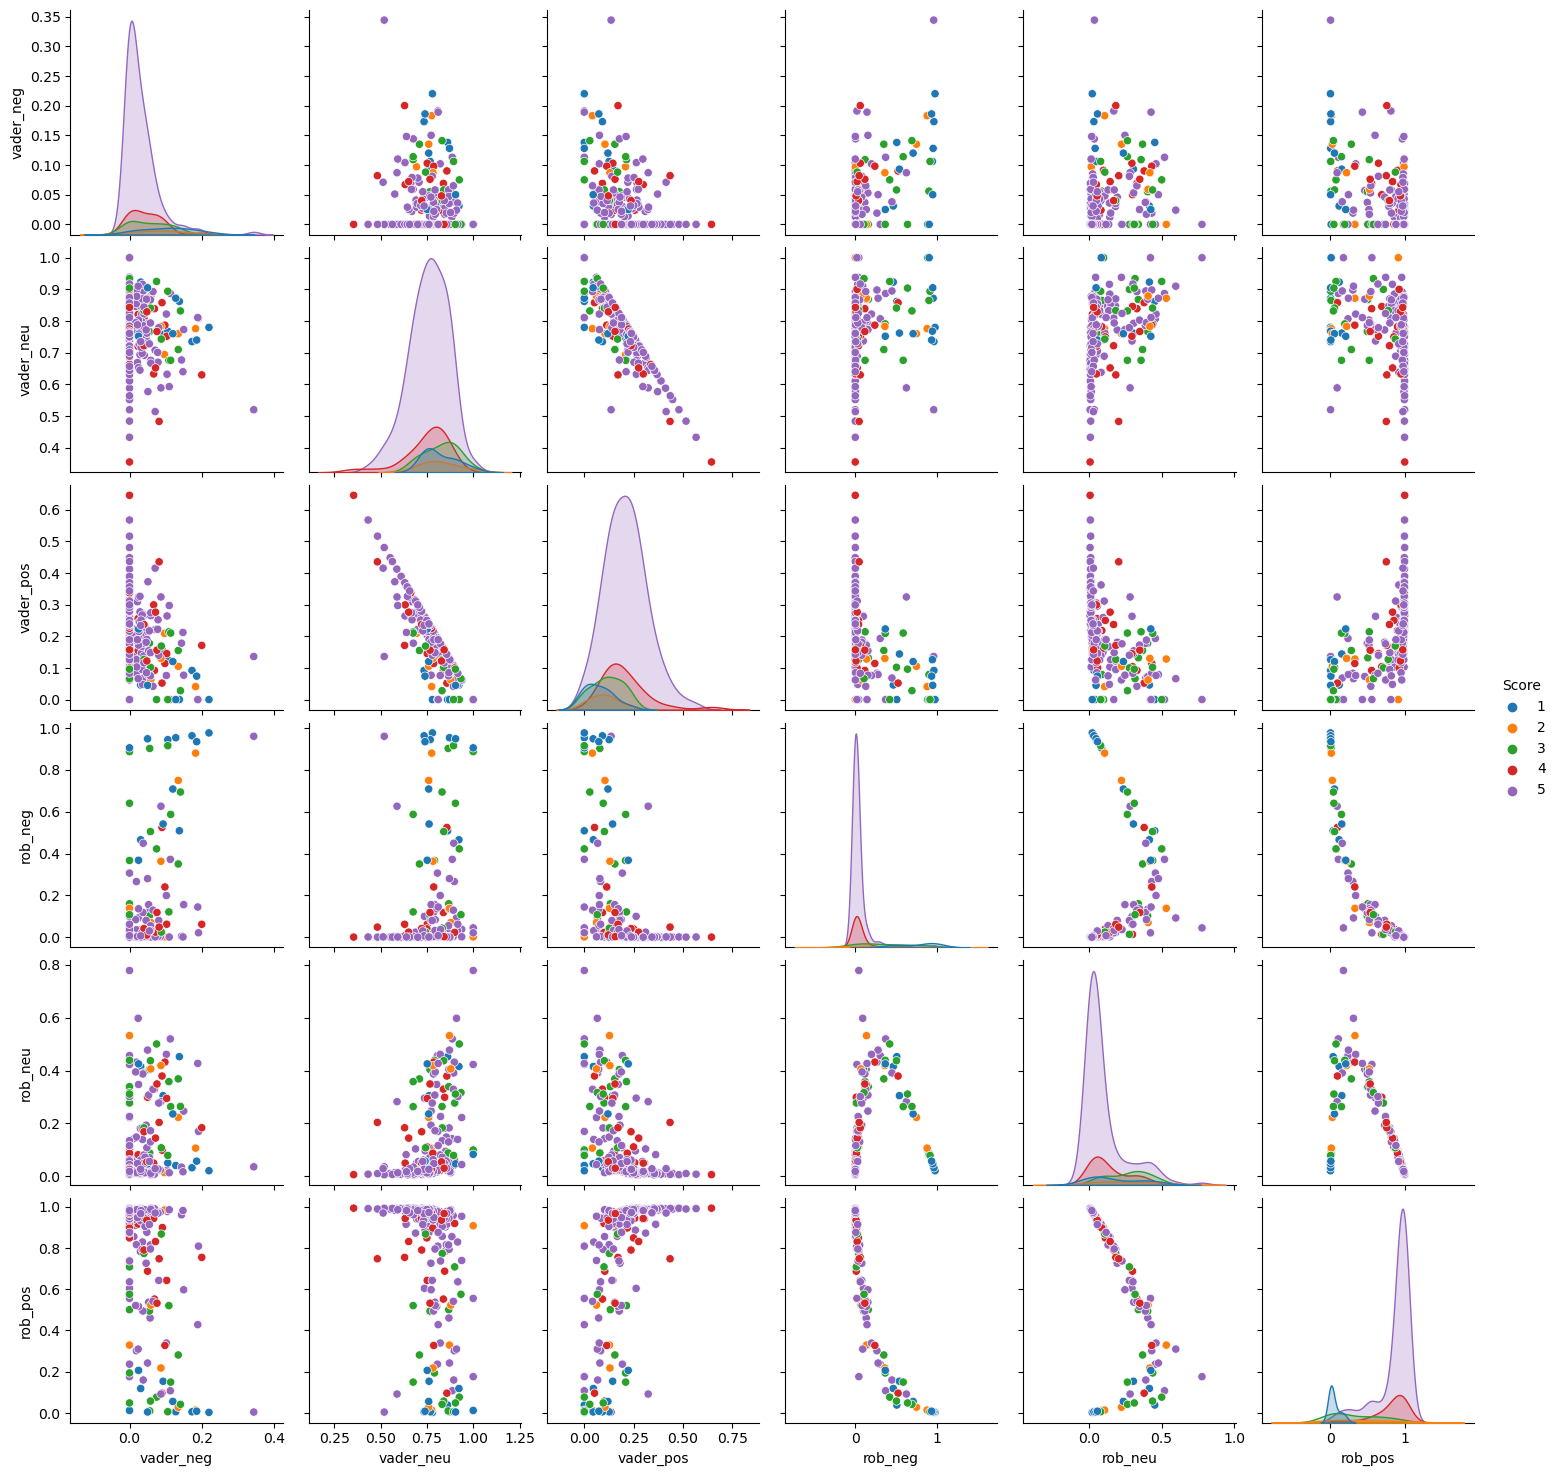

In [26]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'rob_neg', 'rob_neu', 'rob_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [27]:
results_df.query('Score == 1') \
    .sort_values('rob_pos', ascending=False)['Text'].values[0]

'Seriously this product was as tasteless as they come. There are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. You just have to season it or combine it with something else to share the flavor.'

In [28]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]


'Seriously this product was as tasteless as they come. There are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. You just have to season it or combine it with something else to share the flavor.'

In [29]:
results_df.query('Score == 5') \
    .sort_values('rob_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [30]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [31]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


E:\myLearning\ds_project1\env\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\DELL\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [32]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [33]:
sent_pipeline('Make sure to like and subscribe!')

[{'label': 'POSITIVE', 'score': 0.9991742968559265}]